In [ ]:
! pip install pandas matplotlib seaborn scikit-learn 

## Import libraries

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Load dataset

In [20]:
df = pd.read_csv('churn_data.csv')

print(df['Churn'].value_counts())
print(df.head())
print(df.tail())

Churn
No     5174
Yes    1869
Name: count, dtype: int64
   customerID  tenure PhoneService        Contract              PaymentMethod  \
0  7590-VHVEG       1           No  Month-to-month           Electronic check   
1  5575-GNVDE      34          Yes        One year               Mailed check   
2  3668-QPYBK       2          Yes  Month-to-month               Mailed check   
3  7795-CFOCW      45           No        One year  Bank transfer (automatic)   
4  9237-HQITU       2          Yes  Month-to-month           Electronic check   

   MonthlyCharges  TotalCharges Churn  
0           29.85         29.85    No  
1           56.95       1889.50    No  
2           53.85        108.15   Yes  
3           42.30       1840.75    No  
4           70.70        151.65   Yes  
      customerID  tenure PhoneService        Contract  \
7038  6840-RESVB      24          Yes        One year   
7039  2234-XADUH      72          Yes        One year   
7040  4801-JZAZL      11           No  Month-t

# 1. Business understanding - ML model

## Preprocess Data for modelling

In [13]:
df = df.drop('customerID', axis=1)

# Convert binary Churn to numerical
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

df = pd.get_dummies(df, columns=['PhoneService', 'Contract', 'PaymentMethod'], drop_first=True)


## Split and train data

In [14]:
# Split the data into features (X) and var (y)
X = df.drop('Churn', axis=1)
y = df['Churn']

# training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a machine learning model
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)

model = SVC(random_state=42)
model.fit(X_train_imputed, y_train)

# predictions
X_test_imputed = imputer.transform(X_test)
y_pred = model.predict(X_test_imputed)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

# Display results
print(f'Accuracy: {accuracy:.2f}')
print(f'Confusion Matrix:\n{conf_matrix}')
print('Classification Report:\n', classification_report_str)

Accuracy: 0.81
Confusion Matrix:
[[949  87]
 [183 190]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.92      0.88      1036
           1       0.69      0.51      0.58       373

    accuracy                           0.81      1409
   macro avg       0.76      0.71      0.73      1409
weighted avg       0.80      0.81      0.80      1409



## Plot Confusion Matrix

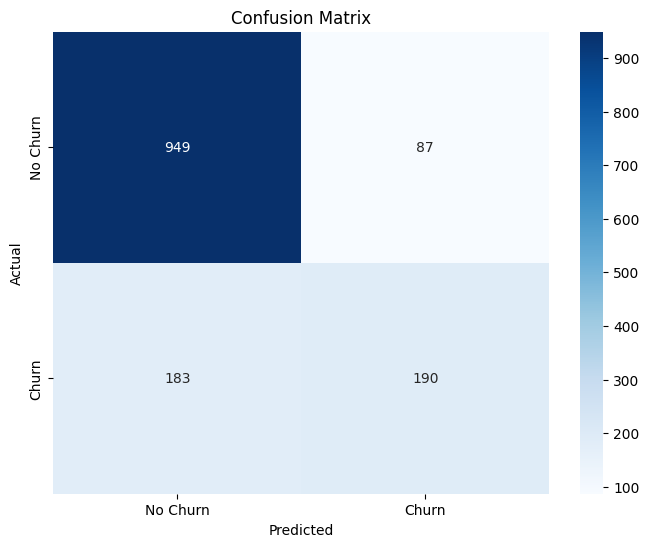

In [15]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# 2. Data Understanding 

## Histogram with Churn against TotalCharges

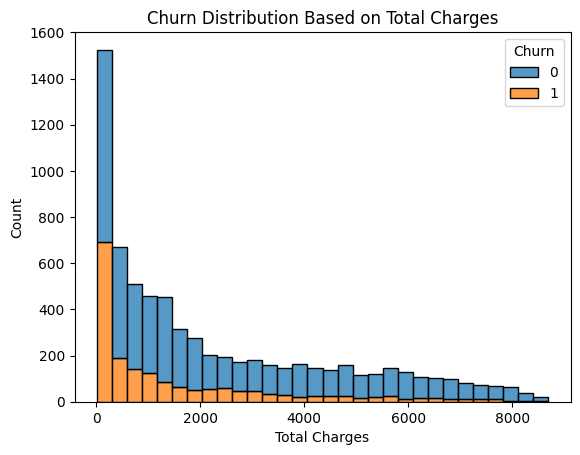

In [16]:
sns.histplot(data=df, x='TotalCharges', hue='Churn', multiple='stack', bins=30)
plt.xlabel('Total Charges')
plt.ylabel('Count')
plt.title('Churn Distribution Based on Total Charges')
plt.show()

## Bar plots

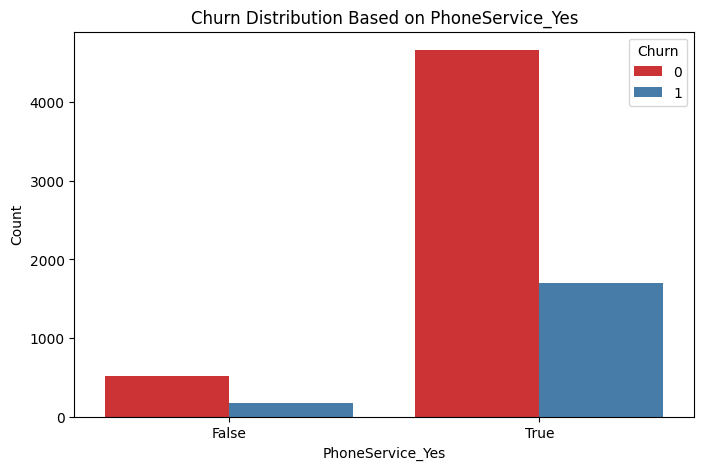

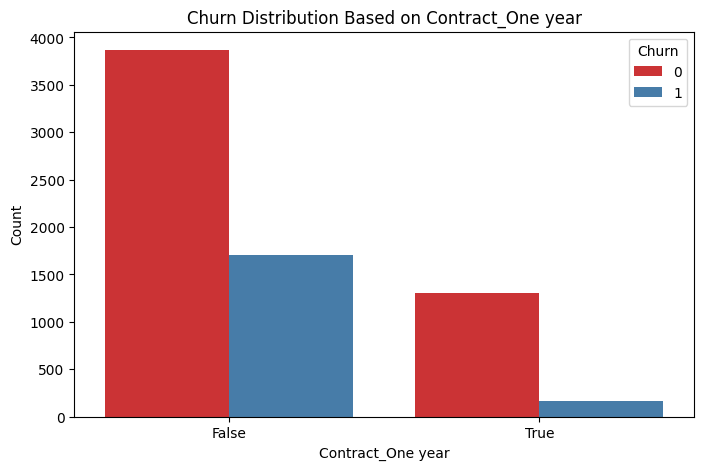

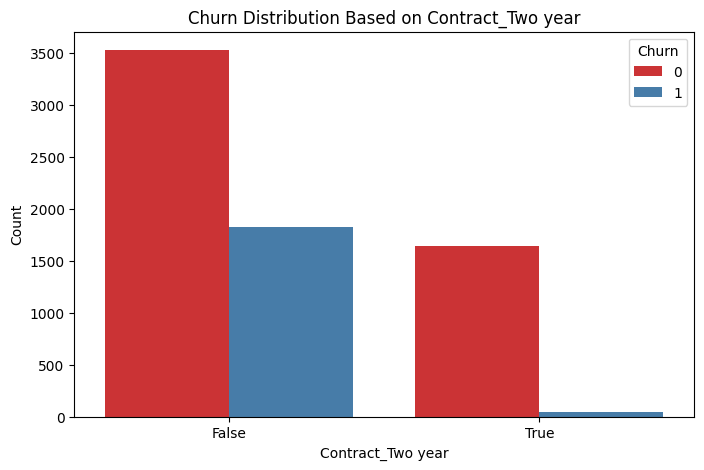

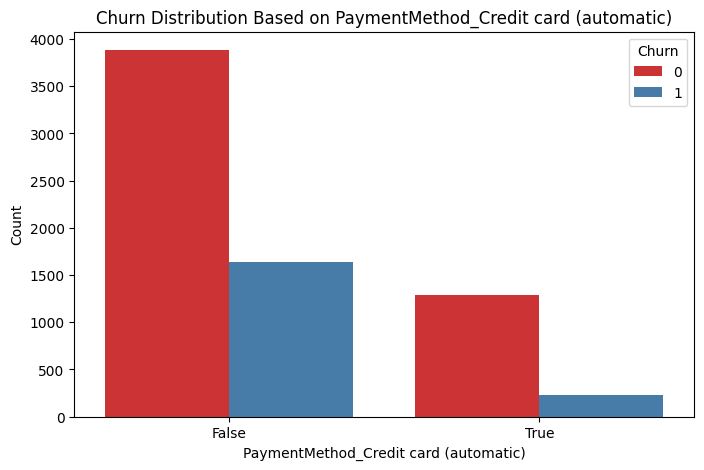

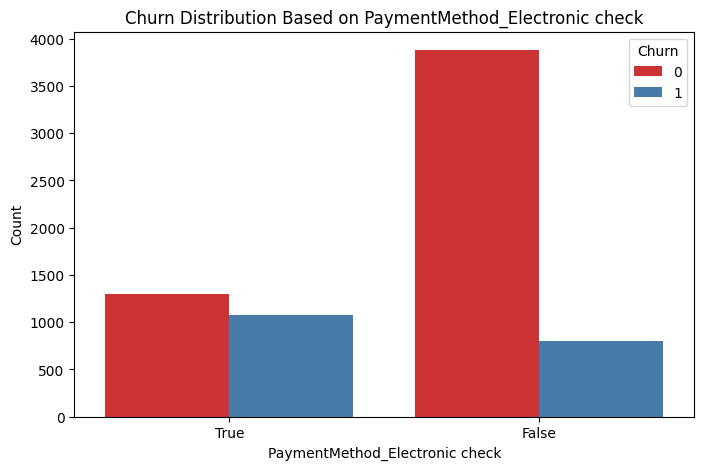

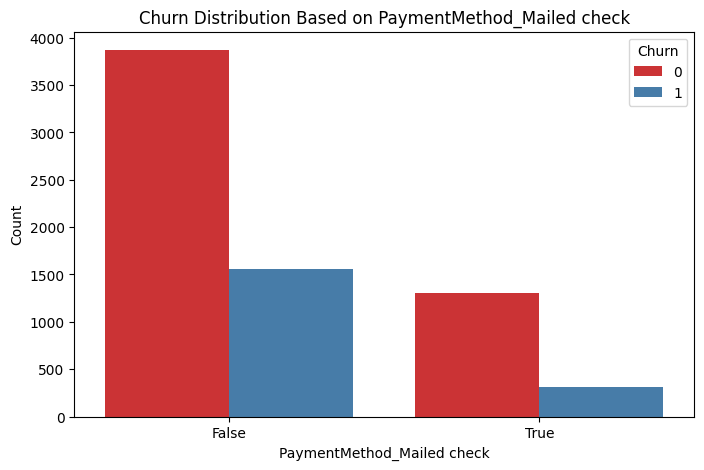

In [17]:

newColumns = ['PhoneService_Yes', 'Contract_One year', 'Contract_Two year', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']

for column in newColumns:
    df[column] = df[column].astype(str)

# Plot countplot for each categorical column
for column in newColumns:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x=column, hue='Churn', palette='Set1')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.title(f'Churn Distribution Based on {column}')
    plt.show()


## Scatter plot

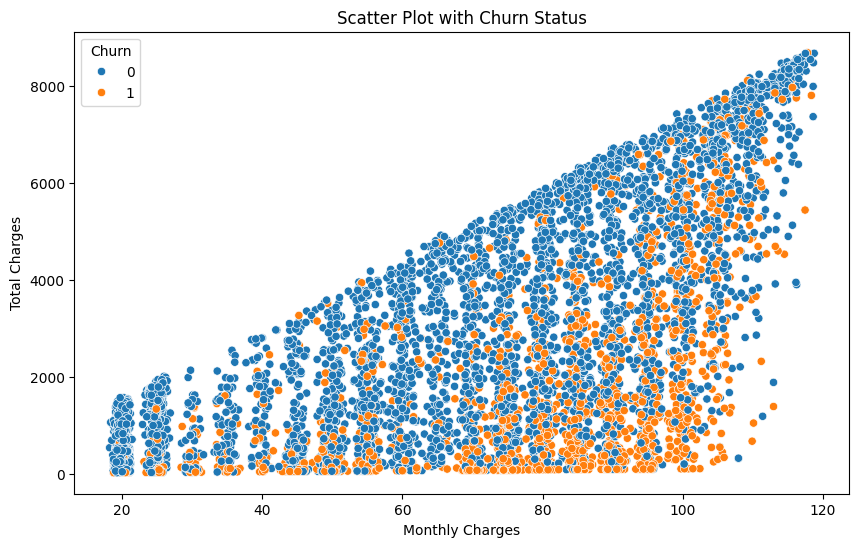

In [18]:
# Scatter plot with churn as hue
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='MonthlyCharges', y='TotalCharges', hue='Churn')
plt.xlabel('Monthly Charges')
plt.ylabel('Total Charges')
plt.title('Scatter Plot with Churn Status')
plt.show()

In [21]:
# Filtering
over_median_tenure = df[df['tenure'] > df['tenure'].median()].copy()

df['tenure'] > df['tenure'].median()

over_median_tenure_moc = df[(df['tenure'] > df['tenure'].median()) & (df['MonthlyCharges'] > df['MonthlyCharges'].median())].copy()

print(over_median_tenure_moc) 
df.info()

      customerID  tenure PhoneService        Contract  \
12    8091-TTVAX      58          Yes        One year   
13    0280-XJGEX      49          Yes  Month-to-month   
15    3655-SNQYZ      69          Yes        Two year   
17    9959-WOFKT      71          Yes        Two year   
26    6467-CHFZW      47          Yes  Month-to-month   
...          ...     ...          ...             ...   
7023  1035-IPQPU      63          Yes  Month-to-month   
7024  7398-LXGYX      44          Yes  Month-to-month   
7034  0639-TSIQW      67          Yes  Month-to-month   
7039  2234-XADUH      72          Yes        One year   
7042  3186-AJIEK      66          Yes        Two year   

                  PaymentMethod  MonthlyCharges  TotalCharges Churn  
12      Credit card (automatic)          100.35       5681.10    No  
13    Bank transfer (automatic)          103.70       5036.30   Yes  
15      Credit card (automatic)          113.25       7895.15    No  
17    Bank transfer (automatic)    

# Analysis and Interpretation

## Model Evaluation Results
Accuracy: 0.81 

**Confusion Matrix**
[[949 87]
 [183 190]]

**Classification Report**
```shell 
	precision	 recall     f1-score   support
0       0.84      0.92      0.88      	1036
1       0.69      0.51      0.58       	373
```

```shell
accuracy                         0.81      1409
macro avg     0.76     0.71      0.73      1409
weighted avg   0.80    0.81      0.80      1409
```
**Interpretation**
Accuracy - The model achieved an accuracy of 79%, which represents the overall correct predictions out of the total predictions.
Confusion Matrix - The confusion matrix provides a detailed breakdown of the model's predictions
    True Negatives (TN) for class 0 (non-churn): 949
    True Positives (TP) for class 1 (churn): 190
    False Positives (FP): 87 (Predicted as non-churn but actually churn)
    False Negatives (FN): 183 (Predicted as churn but actually non-churn)

**Classification Report**

```shell 
Precision (class 0): 0.84 - 84% of the predicted non-churn cases were correct.

Recall (class 0): 0.92 - Out of all actual non-churn cases, the model identified 89% of them.

F1-score (class 0): 0.88 - A balanced measure considering both precision and recall for non-churn class.

Precision (class 1): 0.69 - 69% of the predicted churn cases were correct.

Recall (class 1): 0.51 - Out of all actual churn cases, the model identified 51% of them.

F1-score (class 1): 0.58 - A balanced measure considering both precision and recall for the churn class.
```
The model performs well in predicting non-churn cases (class 0) with high precision (84%) and recall (92%), as indicated by the high F1-score (0.88). However, the model's performance for predicting churn cases (class 1) is not as strong, with lower precision (69%), recall (51%), and F1-score (0.58).

## Histogram for TotalCharges
The histogram depicts the distribution of total charges for both churned and non-churned customers.The stacked bars represent the counts of customers at different total charge levels. It reveals that many churn instances occur among customers.


## Bar Plots

The bar plots show the distribution of churn for different categories in the New columns generated from PhoneService, Contract, PaymentMethod columns.

**Interpretation**

**PhoneService**

Customers with PhoneService are more prevalent.
The bar plot shows the distribution of churn for customers with and without PhoneService. Churn is higher for customers with PhoneService.
          
**Contract**

Most customers have a month-to-month contract, followed by one-year and two-year contracts.
Month-to-month contract customers have a higher churn rate compared to one-year and two-year contract customers. Long-term contracts are associated with lower churn.
          
**PaymentMethod**

Electronic check is the most common payment method, followed by Mailed check, Bank transfer, and Credit card.
Electronic check customers have a higher churn rate compared to other payment methods.
Customers using Credit card or Bank transfer have lower churn rates.

**Business Implication**

Understanding the distribution of churn across categorical features helps identify factors that influence customer retention.
Strategies to improve customer retention may include promoting longer-term contracts, optimizing payment methods, or addressing issues related to PhoneService.

## Scatter Plot

It shows the relationship between MonthlyCharges and TotalCharges and helps identify patterns and differences between churned and non-churned customers